In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("processed data\sl_all_text_simclean.csv")
df.info()

In [4]:
print("Basic Descriptive Stats:")
df.describe()

Basic Descriptive Stats:


,score,created_utc
count,32727.000000,3.272700e+04
mean,36.165674,1.703346e+09
std,76.351282,6.543499e+07
min,0.000000,1.264017e+09
25%,3.000000,1.675490e+09
50%,8.000000,1.727299e+09
75%,34.000000,1.749119e+09
max,2574.000000,1.764238e+09


In [5]:
# Word count
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))
print(df["word_count"].describe())


count    32727.000000
mean        91.813151
std        211.125505
min          1.000000
25%         25.000000
50%         51.000000
75%        102.000000
max      17626.000000
Name: word_count, dtype: float64


In [6]:
# Character count
df["char_count"] = df["text"].apply(lambda x: len(str(x)))
print(df["char_count"].describe())

count     32727.000000
mean        533.779295
std        1329.579937
min           5.000000
25%         146.000000
50%         289.000000
75%         576.000000
max      100088.000000
Name: char_count, dtype: float64


### Histogram of Word Counts

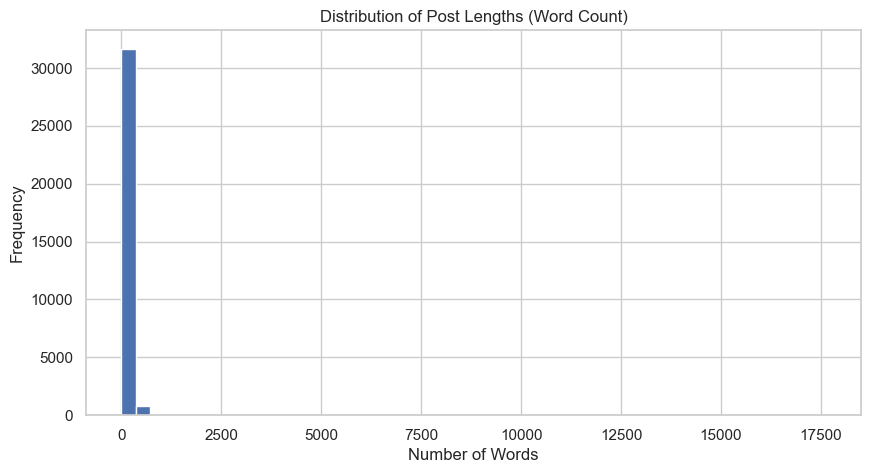

In [7]:
plt.figure(figsize=(10,5))
plt.hist(df["word_count"], bins=50)
plt.title("Distribution of Post Lengths (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### Histogram of Character Counts

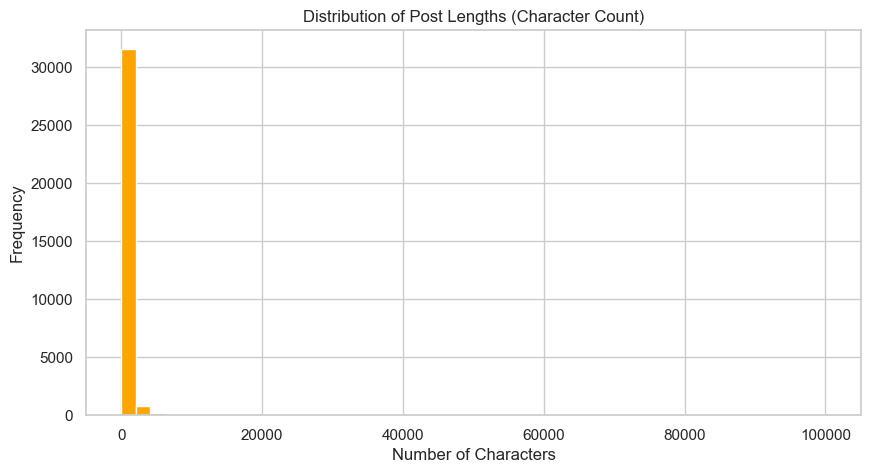

In [8]:
plt.figure(figsize=(10,5))
plt.hist(df["char_count"], bins=50, color="orange")
plt.title("Distribution of Post Lengths (Character Count)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

### Word Frequency Distribution (Top 50 Words)

In [9]:
import re

In [10]:
def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    return text.split()

all_words = []

for t in df["text"]:
    all_words.extend(tokenize(str(t)))

word_freq = Counter(all_words)
common_words = word_freq.most_common(50)

common_words[:10]

[('the', 109636),
 ('to', 92015),
 ('i', 76631),
 ('and', 73608),
 ('a', 71730),
 ('in', 55771),
 ('of', 48467),
 ('for', 37257),
 ('is', 35346),
 ('it', 31234)]

### Top 30 Most Frequent Words

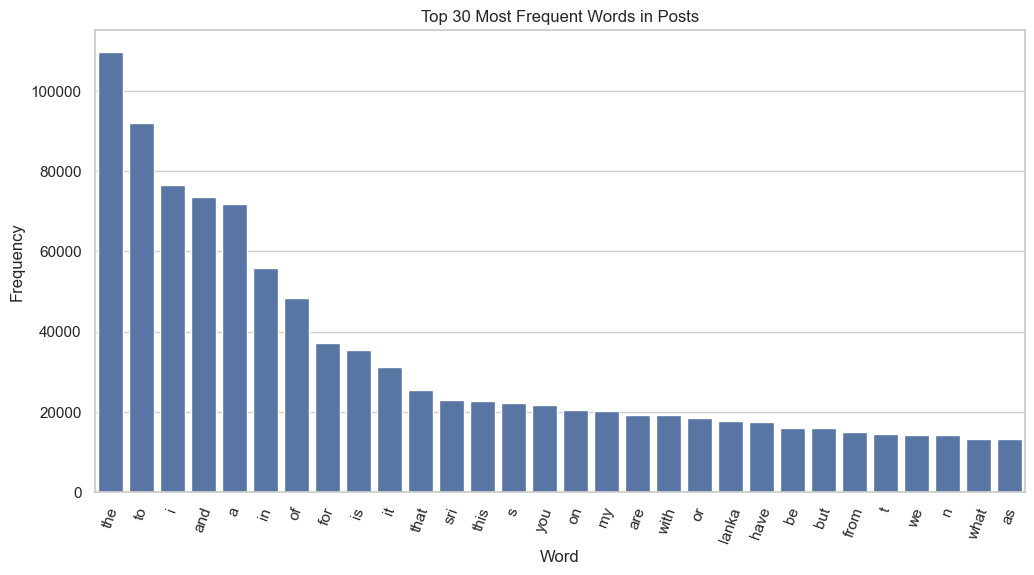

In [11]:
words, counts = zip(*common_words[:30])

plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=70)
plt.title("Top 30 Most Frequent Words in Posts")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

### Word Cloud Visualization

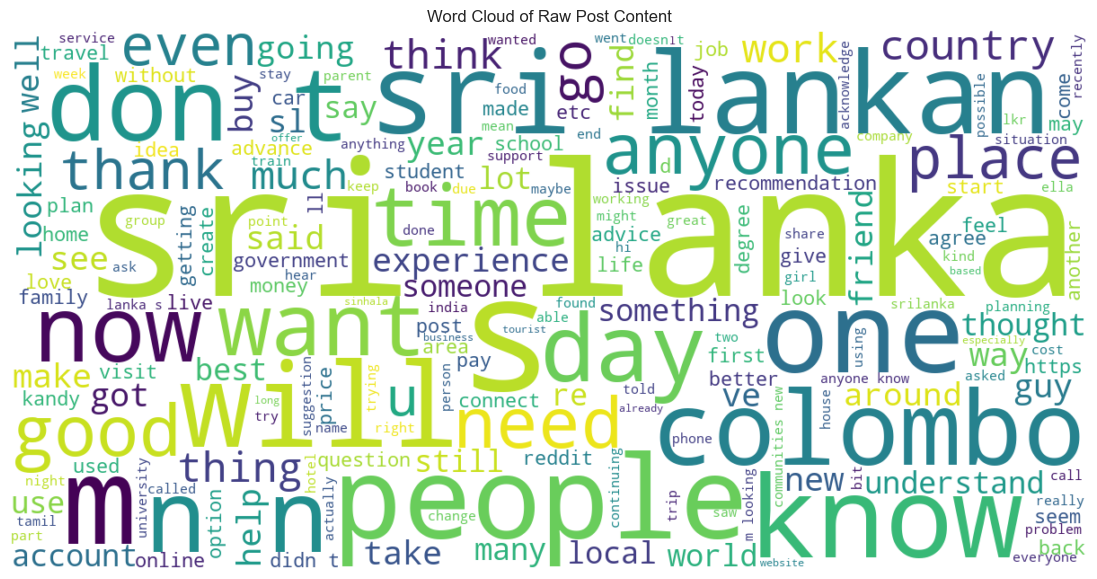

In [12]:
    wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(" ".join(all_words))

    plt.figure(figsize=(14,7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Raw Post Content")
    plt.show()

### Post Type Distribution

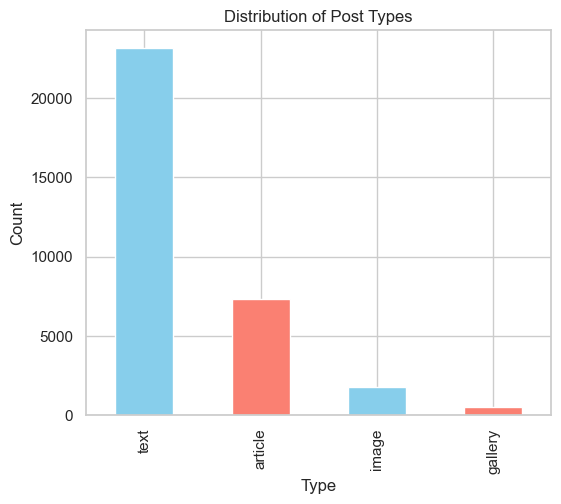

In [13]:
plt.figure(figsize=(6,5))
df["type"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution of Post Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [14]:
df["created_datetime"] = pd.to_datetime(df["created_utc"], unit="s")
df["created_datetime"] = df["created_datetime"].dt.tz_localize("UTC").dt.tz_convert("Asia/Colombo")

In [15]:
df["date"] = df["created_datetime"].dt.date
df["year"] = df["created_datetime"].dt.year
df["month"] = df["created_datetime"].dt.tz_convert(None).dt.to_period("M")
df["day"] = df["created_datetime"].dt.day
df["dow"] = df["created_datetime"].dt.day_name()
df["hour"] = df["created_datetime"].dt.hour

### Daily Post Count Plot

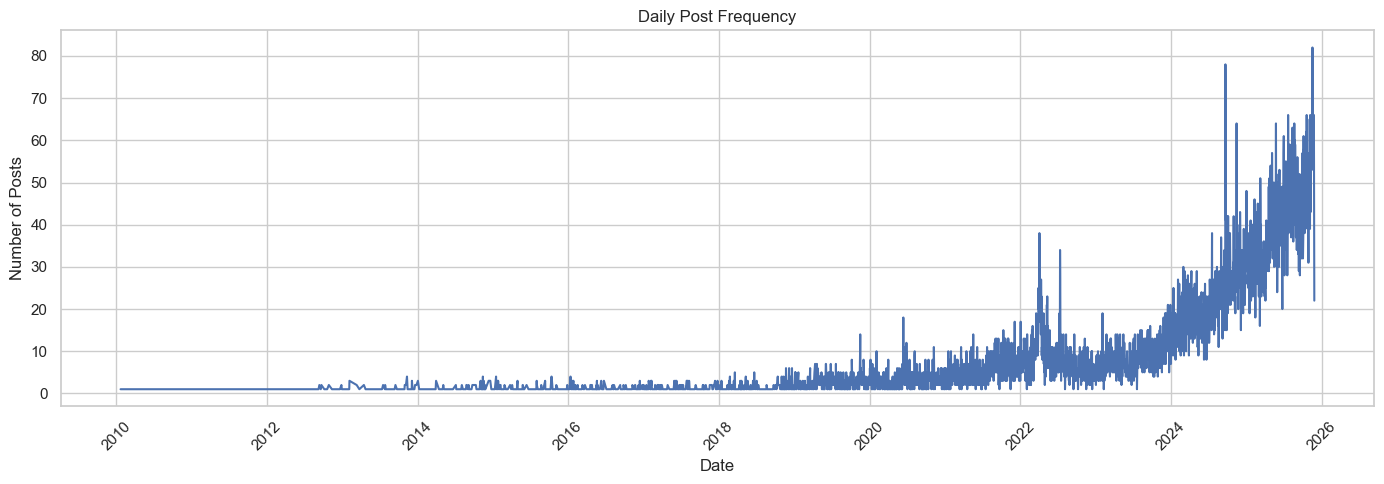

In [16]:
daily_counts = df.groupby("date").size()

plt.figure(figsize=(14, 5))
plt.plot(daily_counts.index, daily_counts.values)
plt.title("Daily Post Frequency")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly Trend Plot

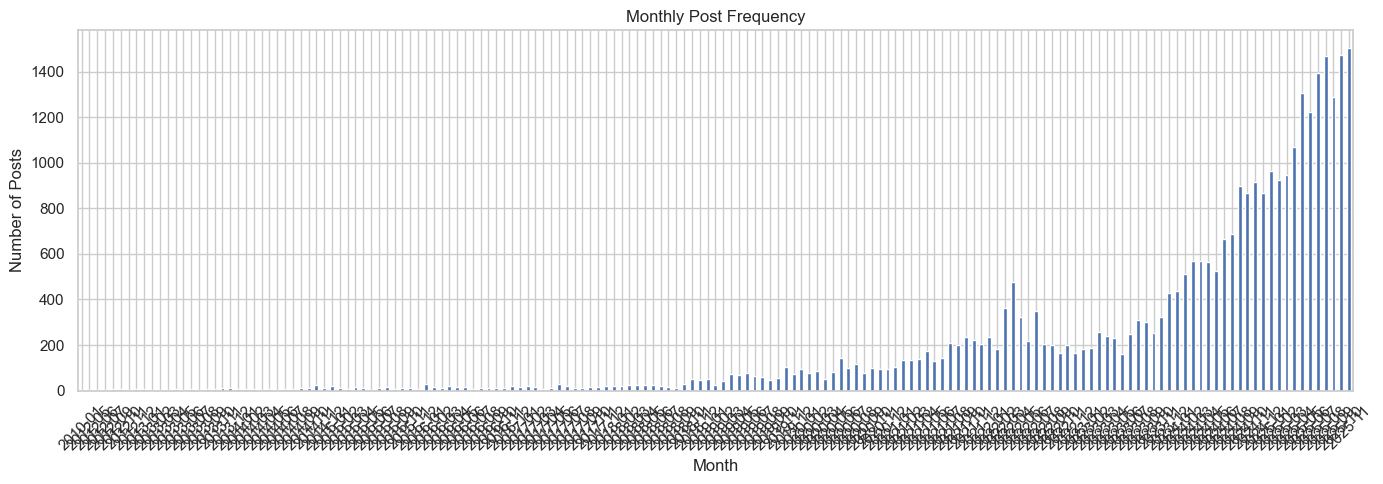

In [17]:
monthly_counts = df.groupby("month").size()

plt.figure(figsize=(14, 5))
monthly_counts.plot(kind="bar")
plt.title("Monthly Post Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Hour-of-Day Posting Pattern

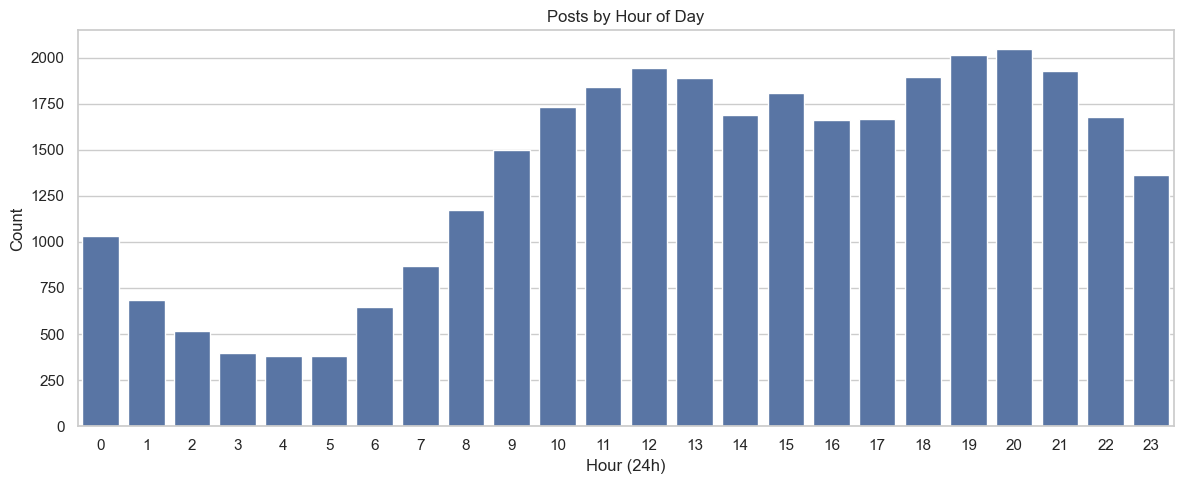

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x="hour", data=df)
plt.title("Posts by Hour of Day")
plt.xlabel("Hour (24h)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Day-of-Week Posting Pattern

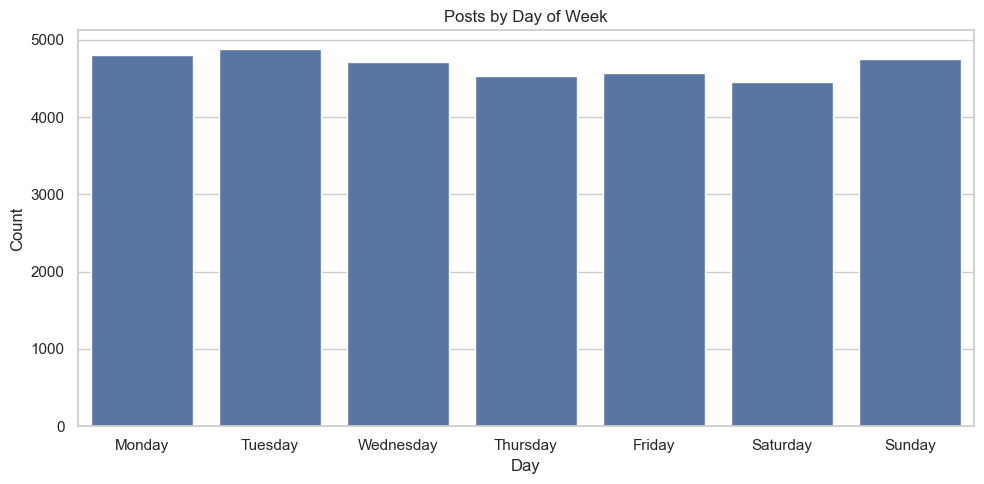

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x="dow", data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Posts by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [21]:
if not df.empty:
    df.to_csv("processed data\sl_all_text_analyzed.csv", index=False, encoding="utf-8")
    print("Data collection complete. Saved to processed data\sl_all_text_analyzed.csv")
else:
    print("\nNo text posts were collected.")

Data collection complete. Saved to processed data\sl_all_text_analyzed.csv
